In [1]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Load libraries
import pandas
import numpy
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier        
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

readdata = pandas.read_csv('BDOShohamIML.csv')
dataset = pandas.DataFrame(readdata, columns=['Vsl', 'Vsg', 'VisL', 'VisG', 'DenL', 'DenG', 'ST', 'Ang', 'ID', 'Flow Pattern'])

# Summarize the Dataset

# shape
print(dataset.shape)

# head
print(dataset.head(20))

# Statistical Summary

# descriptions
print(dataset.describe())

# Class Distribution

# class distribution
print(dataset.groupby('Flow Pattern').size())

(5675, 10)
    Vsl    Vsg   VisL     VisG  DenL  DenG    ST  Ang     ID Flow Pattern
0   6.3  0.025  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
1   4.0  0.040  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
2   6.3  0.040  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
3   4.0  0.063  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
4   6.3  0.063  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
5   4.0  0.100  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
6   6.3  0.100  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
7   4.0  0.160  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
8   6.3  0.160  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
9   4.0  0.400  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
10  6.3  0.400  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
11  4.0  0.630  0.001  0.00002  1000   1.8  0.07  0.0  0.051           DB
12  6.3  0.630  0.001  0.00

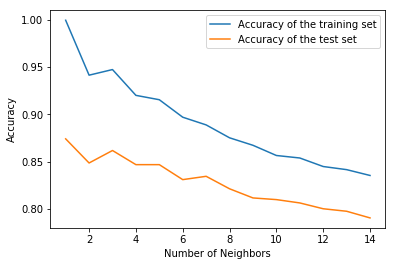

In [2]:
# Evaluate Some Algorithms
# what we apply in this project:
# KNN
# Decision Tree
# Random Forests
# SVM
# Neural Network
#########################

# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#----------KNN Classifier 
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()
#by looking at plot, best result accurs when n_neighbors is 1-4

In [3]:
print("Accuracy of the training set for 1NN: {:3f}".format(training_accuracy[0]))
print("Accuracy of the test set for 1NN: {:3f}".format(test_accuracy[0]))

Accuracy of the training set for 1NN: 0.999559
Accuracy of the test set for 1NN: 0.874009


In [4]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.667
Accuracy on the test set: 0.658


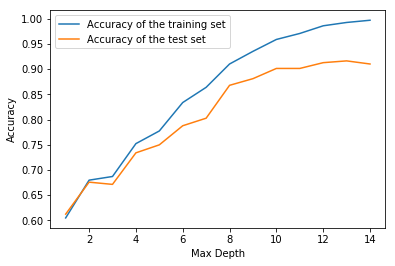

In [5]:
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

# by looking at plot, best result occurs when max_depth is > 4

In [6]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 1.000
acc for test data: 0.948


In [7]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.684
acc for test data: 0.686


In [8]:
from sklearn.svm import SVC 
svm= SVC()
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))


acc on train dataset: 0.829
acc on test dataset: 0.809
